# Case 1. Heart Disease Classification

Cognitive Systems for Health Technology Applications, Spring 2018<br>
Matias Olkkonen <br>
Helsinki Metropolia University of Applied Scienses<br>

# 1. Objectives

In this case we create a neural network that learns decision making from the given data. In this case we wanted to know if the patient had a possibility to have a heart disease.

#  2. Required libraries

In [2]:
#Importing needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from keras import Sequential

Using TensorFlow backend.


# 3. Data description and preprocessing

In [17]:
# location of the dataset

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
filename1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data'
filename2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'
filename3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data'

# Column names
colnames = ['age','sex','cp','trestbps','chol',
            'fbs','restecg','thalach','exang',
            'oldpeak','slope','ca','thal','num']

# Reading the data frames
df1 = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')
df2 = pd.read_csv(filename1, 
                 names = colnames, 
                 na_values = '?')
df3 = pd.read_csv(filename2, 
                 names = colnames, 
                 na_values = '?')
df4 = pd.read_csv(filename3, 
                 names = colnames, 
                 na_values = '?')

# Merging data frames as one
frames = [df1,df2,df3,df4]
df = pd.concat(frames)

# Changing index from 0-919
df.index = range(920)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
# Replacing nan-values to 0

df = df.where(~np.isnan(df), df.mode(), axis = 'columns')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
label = df['num']>0    #output value : false = healthy , true = heart disease
label.head()

0    False
1     True
2     True
3    False
4    False
Name: num, dtype: bool

In [7]:
# Data normalization
df = (df-df.min())/(df.max()-df.min())


In [8]:
# Selecting the columns

columns = ['age', 'sex','cp',
           'trestbps', 'chol', 'fbs', 
           'restecg', 'thalach', 'exang',
           'oldpeak', 'slope','ca',
            'thal']
data = df[columns].values

In [9]:

ndata= 920 # total number of samples

# Dividing the data for training and testing

ntrain=int(0.8*ndata) # 80% from data for training, 20% for testing
train_data=data[:ntrain]
train_label=label[:ntrain]
test_data=data[ntrain:]
test_label=label[ntrain:]


In [10]:
# Defining the architecture of the network

from keras import models, layers

network=models.Sequential()
network.add(layers.Dense(15, activation = 'relu', input_shape=(13, )))
network.add(layers.Dense(15, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid')) #ensures output is in


In [11]:
# Compiling the network

network.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics =['accuracy'])

# 5. Training and Validation 

In [12]:
# Network training

network.fit(train_data, train_label, epochs = 40, batch_size = 128, verbose = 0)

# 6. Results and Discussion

In [13]:
# Testing the trained network

test_loss, test_acc = network.evaluate(test_data, test_label)
print('test_acc', test_acc)

184/184 [==============================] - 0s 326us/step
test_acc 0.711956521739


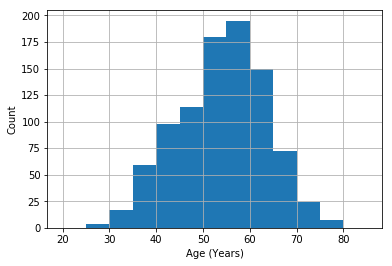

In [14]:
# Age distribution of the data
df = pd.concat(frames)
df['age'].hist(bins = np.arange(20,90,5))
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()


# 7. Conclusions

Creating the network went well and I managed to get some data out. I also managed to get pretty good percent for the accuracy best of which was 75%.